# House Price Prediction using Linear Regression (Multiple Features)

## Step 1: Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Create Dataset with Multiple Features

In [3]:
# Features: [size in sqft, number of bedrooms, age in years]
X = np.array([
    [2100, 3, 20],
    [1600, 2, 15],
    [2400, 4, 5],
    [1400, 2, 20],
    [3000, 4, 8],
    [1800, 3, 10],
    [2200, 3, 12],
    [2500, 4, 7],
    [1700, 2, 14],
    [1900, 3, 10]
])

# Prices (in ₹ Lakhs)
y = np.array([400, 330, 550, 310, 610, 365, 445, 525, 340, 370])
m = len(y)  # Number of samples

## Step 3: Normalize Features (important for gradient descent)

<img src="Normalization.png" width="700">

In [4]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

## Step 4: Add Bias Term (column of 1s)

<img src="Bias.png" width="700">

In [5]:
X_b = np.c_[np.ones((m, 1)), X_norm]  # shape: (m, n+1)

## Step 5: Define Cost Function (MSE)

<img src="Cost Function.png" width="700">

In [1]:
def compute_cost(X, y, theta):
    m = len(y)
    
    predictions = X @ theta
    e
    rror = predictions - y
    
    cost = (1 / (2 * m)) * np.sum(error ** 2)
   
    return cost

## Step 6: Gradient Descent

<img src="Gradient Descent.png" width="700">

In [7]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        
        predictions = X @ theta
        
        errors = predictions - y
       
        gradients = (1 / m) * (X.T @ errors)
        
        theta = theta - learning_rate * gradients
       
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

## Step 7: Train the Model

In [8]:
theta_init = np.zeros(X_b.shape[1])
theta_final, cost_history = gradient_descent(X_b, y, theta_init, learning_rate=0.1, iterations=1000)
print("Final parameters (theta):", theta_final)

Final parameters (theta): [424.5         75.79891657  14.74307472 -10.02455578]


## Step 8: Plot Cost Reduction

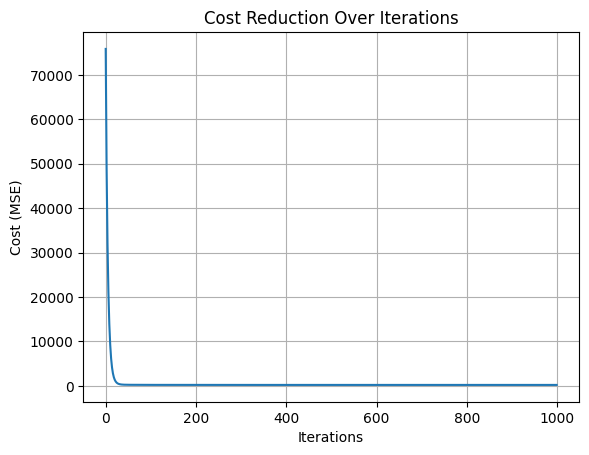

In [9]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

## Step 9: Make Predictions

In [10]:
# New house: [2000 sqft, 3 bedrooms, 12 years]
new_house = np.array([2000, 3, 12])
new_house_norm = (new_house - X_mean) / X_std
new_house_with_bias = np.r_[1, new_house_norm]
predicted_price = new_house_with_bias @ theta_final

print(f"Predicted house price: ₹{predicted_price:.2f} Lakhs")

Predicted house price: ₹414.74 Lakhs
